<a href="https://colab.research.google.com/github/yuhaeun-la/ML-/blob/master/MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **StyleGAN2 DETECTION**



---


The code above tells us whether a photo is made of StyleGAN2.

*contact* us: aiswiproject@gmail.com 

StyleGAN2

In [4]:
!git clone https://github.com/JustinGuese/mtcnn-face-extraction-eyes-mouth-nose-and-speeding-it-up
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

fatal: destination path 'mtcnn-face-extraction-eyes-mouth-nose-and-speeding-it-up' already exists and is not an empty directory.
--2021-06-07 19:53:15--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.4’

shape_predictor_68_ 100%[===================>]  61.07M  4.20MB/s    in 12s     

2021-06-07 19:53:27 (5.16 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.4’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.



#About Module#


###crop_regions###
이미지를 (눈,코,입,얼굴) 로 크롭시켜준다. 


---


###results###
학습된 model을 load한 뒤, 선택한 이미지로 StyleGAN2로 만든 사진인지 아닌지 검사 결과를 나타내준다.


---



In [5]:
import import_ipynb
from crop_regions import crop_face,crop_face_region
from results import Results
import tensorflow as tf
from tensorflow import keras 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

predict_path='/content/shape_predictor_68_face_landmarks.dat'

importing Jupyter notebook from crop_regions.ipynb
importing Jupyter notebook from results.ipynb




1.   f_path = "***이미지의 주소*** "
2.   raw_img=f_path+"***이미지 이름.이미지 확장자*** " 

> ex)img.jpg







In [6]:
f_path="./img/"
raw_img=f_path+""
face_img=crop_face(raw_img)
mouth_img,eye_img,nose_img=crop_face_region(raw_img,predict_path)

index=0
for img in [eye_img,nose_img,mouth_img,face_img]:
  cv2.imwrite(f_path+str(index)+'.png', img)
  index+=1

In [7]:
# eyes, nose, mouth, face
img_list=[]
for i in range(4):
  img_path=f_path+str(i)+'.png'
  img=cv2.imread(img_path,cv2.IMREAD_COLOR)
  img.resize(1,299,299,3)
  img=img.astype("float")/255
  img_list.append(img)

img=cv2.imread(raw_img,cv2.IMREAD_COLOR)
img.resize(1,299,299,3)
img=img.astype("float")/255
img_list.append(img)

##이미지 보기##


> 크롭된 이미지들을 보여준다






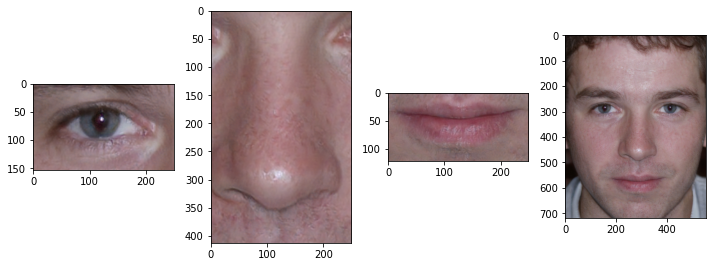

In [8]:
import matplotlib.image as mpimg

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

for i in range(4):
  img_path=f_path+str(i)+'.png'
  image = mpimg.imread(img_path)
  plt.subplot(1, 4, i+1)
  plt.imshow(image)

plt.show()

#**결과 확인**#


> REAL : StyleGAN2로 만들어지지 않은 원본 이미지


> made by StyleGAN2 : StyleGAN2로 만들어진 이미지





In [9]:
Model=Results()
result=Model.show_results(img_list[0],img_list[1],img_list[2],img_list[3],img_list[4])
print("Image is ",result)

Image is  Made by StyleGAN2
